In [ ]:
"""
In this assignment students have to transform iris data into 3 dimensions and plot a 3d
chart with transformed dimensions and color each data point with specific class.
Hint:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


"""

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


In [16]:
iris=datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
A0=iris.data
A0.shape

(150, 4)

In [24]:
A0[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Eigen-Decomposition: 5 step process + Variance retained check

In [28]:
# 1 Normalize columns of $A$ so that each feature has zero mean


mu=np.mean(A0,axis=0)
print(mu)

[5.84333333 3.05733333 3.758      1.19933333]


In [29]:
A=A0 - mu
A[:5,:]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

In [31]:
print(np.mean(A,axis=0)) 

# extremely small values close to zero. 
# hence A has means as zero across all rows.

[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


In [34]:
# 2.  Compute sample covariance matrix $ \Sigma = {A^T. A}/{(m-1)} $

m,n=A.shape
print(m)

Sigma = (A.T @ A)/(m-1)
Sigma

150


array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [38]:
# 3 Perform EigenDecomposition of $\Sigma$ using ' np.linalg.eig(Sigma)'

# l=Eigenvalues
# X=Eigenvectors

l,X=np.linalg.eig(Sigma)
print("Evalues:",l)
print("Evectors:")
print(X)

Evalues: [4.22824171 0.24267075 0.0782095  0.02383509]
Evectors:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [41]:
# 4 Compress by ordering k evectors according to largest evalues
# and compute A.X_k

print("Compress 4D to 3D:\n")

Acomp= A @ X[:,:3] # first 3 vectors
print(Acomp[:5,:])

Compress 4D to 3D:

[[-2.68412563 -0.31939725 -0.02791483]
 [-2.71414169  0.17700123 -0.21046427]
 [-2.88899057  0.14494943  0.01790026]
 [-2.74534286  0.31829898  0.03155937]
 [-2.72871654 -0.32675451  0.09007924]]


In [44]:
# Reconstruct from compressed version by computing$ A.X_k.X_k^T $

print("Reconstructed version of 3D to 4D:\n")

Arec= A @ X[:,:3]@X[:,:3].T # first 3 evectors
print(Arec[:5,:] + mu) # first 5 observations, adding mu(mean) to compare original

Reconstructed version of 3D to 4D:

[[5.09928623 3.50072335 1.40108561 0.1982949 ]
 [4.86875839 3.03166108 1.4475168  0.12536791]
 [4.69370023 3.20638436 1.30958161 0.18495067]
 [4.6238432  3.07583667 1.46373578 0.25695828]
 [5.0193263  3.58041421 1.37060574 0.24616799]]


In [ ]:
# Lets do with sklearn library



In [56]:
from sklearn.decomposition import PCA

# here its done by SVD (singular value decomposition and not eigen decomposition)

pca=PCA(n_components=3)
pca.fit(A0)

print("Principal components:")
print(pca.components_)

print("________________")
print("Compressed -4D to 3D:")
print(pca.transform(A0)[:5,:]) # firrst 5 observations, select 3 n_components above.

print("_____________")
print("Reconstructed - 3D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:])

print("__________")
print("Variance explained:")
print(pca.explained_variance_ratio_)


Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
________________
Compressed -4D to 3D:
[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]]
_____________
Reconstructed - 3D to 4D:
[[5.09928623 3.50072335 1.40108561 0.1982949 ]
 [4.86875839 3.03166108 1.4475168  0.12536791]
 [4.69370023 3.20638436 1.30958161 0.18495067]
 [4.6238432  3.07583667 1.46373578 0.25695828]
 [5.0193263  3.58041421 1.37060574 0.24616799]]
__________
Variance explained:
[0.92461872 0.05306648 0.01710261]


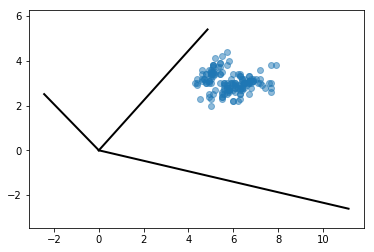

In [69]:
plt.plot(A0[:, 0], A0[:, 1],'o', alpha=0.5)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 15 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=2)

plt.axis('equal');